In [1]:
from bsread import source, SUB, PULL, PUSH, PUB
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context(context="talk")
sns.set_style(style='darkgrid')

In [12]:
#from cam_server.utils import get_host_port_from_stream_address

port=9005
host = "sf-daqsync-02.psi.ch"
mode = SUB
num_shots = 1
spec_cent_AVG = []
spec_FWHM_AVG = []
spec_AVG = []
with source(host=host, port=port, mode=SUB) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
        print(message.data.data.keys())
        spec_cent_AVG.append(message.data.data['SARFE10-PSSS059:SPECTRUM_AVG_CENTER'].value)
        spec_FWHM_AVG.append(message.data.data['SARFE10-PSSS059:SPECTRUM_AVG_FWHM'].value)
        spec_AVG.append(message.data.data['SARFE10-PSSS059:SPECTRUM_AVG_Y'].value)
# spec_cent = np.array(spec_cent)
# spec_cent_AVG = np.array(spec_cent_AVG)

# spec_com = np.array(spec_com)
# spec_FWHM = np.array(spec_FWHM)
# spec_FWHM_AVG = np.array(spec_FWHM_AVG)
# spec_STD = np.array(spec_STD)
# spec = np.array(spec)
spec_AVG = np.array(spec_AVG)
# axis = np.array(axis)

odict_keys(['SARFE10-PSSS059:SPECTRUM_AVG_Y', 'SARFE10-PSSS059:SPECTRUM_AVG_CENTER', 'SARFE10-PSSS059:SPECTRUM_AVG_FWHM'])


In [13]:
spec_AVG.shape

(1, 2560)

 ...]

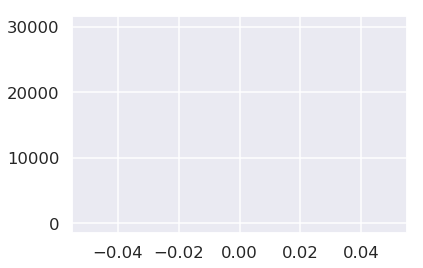

In [11]:
plt.figure()
plt.plot(np.asarray(spec_AVG)

## Comparing fit and stat

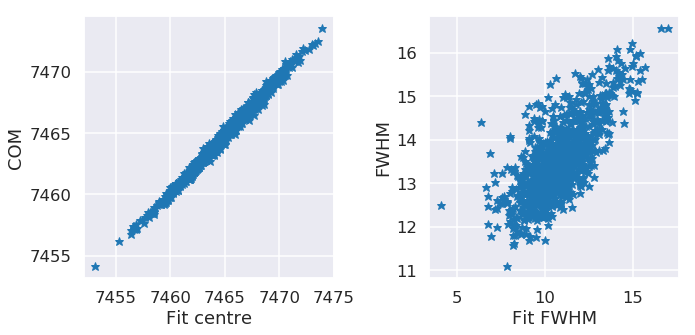

In [53]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(spec_cent, spec_com, '*')
plt.xlabel('Fit centre')
plt.ylabel('COM')
plt.subplot(122)
plt.plot(spec_FWHM, np.asarray(spec_STD)*2.355, '*')
plt.xlabel('Fit FWHM')
plt.ylabel('FWHM')
plt.tight_layout()

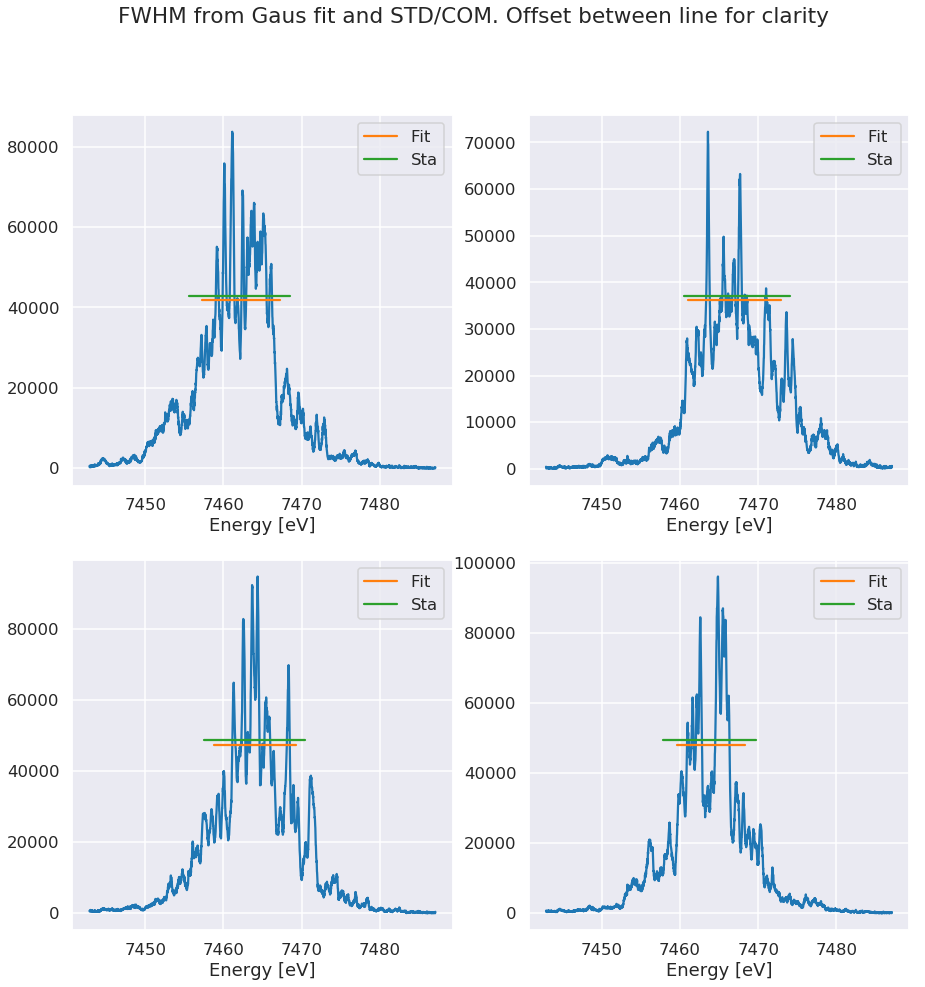

In [43]:
plt.figure(figsize=[15,15])
plt.suptitle('FWHM from Gaus fit and STD/COM. Offset between line for clarity ')
plt.subplot(221)
ind = 1
fac = 1.95
plt.plot(axis[ind], spec[ind])
plt.plot([spec_cent[ind]-spec_FWHM[ind]/2,spec_cent[ind]+spec_FWHM[ind]/2],[np.max(spec[ind])/2,np.max(spec[ind])/2], label = "Fit")
plt.plot([spec_com[ind]-spec_STD[ind]*2.355/2,spec_com[ind]+spec_STD[ind]*2.355/2],[np.max(spec[ind])/fac,np.max(spec[ind])/fac], label = "Sta")
plt.xlabel('Energy [eV]')
plt.legend()
plt.subplot(222)
ind = 156
plt.plot(axis[ind], spec[ind])
plt.plot([spec_cent[ind]-spec_FWHM[ind]/2,spec_cent[ind]+spec_FWHM[ind]/2],[np.max(spec[ind])/2,np.max(spec[ind])/2], label = "Fit")
plt.plot([spec_com[ind]-spec_STD[ind]*2.355/2,spec_com[ind]+spec_STD[ind]*2.355/2],[np.max(spec[ind])/fac,np.max(spec[ind])/fac], label = "Sta")
plt.xlabel('Energy [eV]')
plt.legend()
plt.subplot(223)
ind = 289
plt.plot(axis[ind], spec[ind])
plt.plot([spec_cent[ind]-spec_FWHM[ind]/2,spec_cent[ind]+spec_FWHM[ind]/2],[np.max(spec[ind])/2,np.max(spec[ind])/2], label = "Fit")
plt.plot([spec_com[ind]-spec_STD[ind]*2.355/2,spec_com[ind]+spec_STD[ind]*2.355/2],[np.max(spec[ind])/fac,np.max(spec[ind])/fac], label = "Sta")
plt.xlabel('Energy [eV]')
plt.legend()
plt.subplot(224)
ind = 589
plt.plot(axis[ind], spec[ind])
plt.plot([spec_cent[ind]-spec_FWHM[ind]/2,spec_cent[ind]+spec_FWHM[ind]/2],[np.max(spec[ind])/2,np.max(spec[ind])/2], label = "Fit")
plt.plot([spec_com[ind]-spec_STD[ind]*2.355/2,spec_com[ind]+spec_STD[ind]*2.355/2],[np.max(spec[ind])/fac,np.max(spec[ind])/fac], label = "Sta")
plt.xlabel('Energy [eV]')
plt.legend()

## looking at avg data

In [56]:
spec_AVG.shape

(1000, 2560)

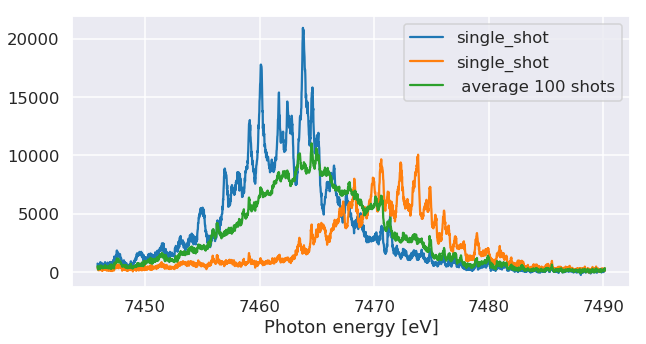

In [66]:
ind = 200
plt.figure(figsize=[10,5])
plt.plot(axis[ind,:],spec[1,:], label='single_shot')
plt.plot(axis[ind,:],spec[15,:], label='single_shot')
plt.plot(axis[ind,:],spec_AVG[ind,:], label=' average 100 shots')
plt.xlabel('Photon energy [eV]')
plt.legend()
